In [20]:
import pandas as pd
data = pd.read_csv("movies.csv")
shape = data.shape
print("Shape = {}".format(shape))

Shape = (9742, 3)


In [19]:
import pandas as pd
data = pd.read_csv("ratings.csv")
shape = data.shape
print("Shape = {}".format(shape))

Shape = (100836, 4)


In [3]:
import pandas as pd
ratings_data = pd.read_csv("ratings.csv")
unique_user_ids = ratings_data['userId'].unique()
num_unique_user_ids = len(unique_user_ids)
print("Number of unique userIds:", num_unique_user_ids)

Number of unique userIds: 610


In [4]:
import pandas as pd
ratings_data = pd.read_csv("ratings.csv")
movie_ratings_count = ratings_data['movieId'].value_counts()
max_rated_movie_id = movie_ratings_count.idxmax()
movies_data = pd.read_csv("movies.csv")
max_rated_movie_title = movies_data.loc[movies_data['movieId'] == max_rated_movie_id, 'title'].values[0]
print(f"The movie with the maximum number of user ratings is: {max_rated_movie_title}")

The movie with the maximum number of user ratings is: Forrest Gump (1994)


In [5]:
import pandas as pd
tags_data = pd.read_csv("tags.csv")
movies_data = pd.read_csv("movies.csv")
matrix_movie_id = movies_data.loc[movies_data['title'] == 'Matrix, The (1999)', 'movieId'].values[0]
matrix_tags = tags_data.loc[tags_data['movieId'] == matrix_movie_id, 'tag']
print("Tags submitted by users for 'Matrix, The (1999)':")
print(matrix_tags.unique())

Tags submitted by users for 'Matrix, The (1999)':
['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']


In [8]:
import pandas as pd
ratings_data = pd.read_csv("ratings.csv")
movies_data = pd.read_csv("movies.csv")
terminator_movie_id = movies_data.loc[movies_data['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]
terminator_ratings = ratings_data.loc[ratings_data['movieId'] == terminator_movie_id, 'rating']
average_rating = terminator_ratings.mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating:.2f}")

The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


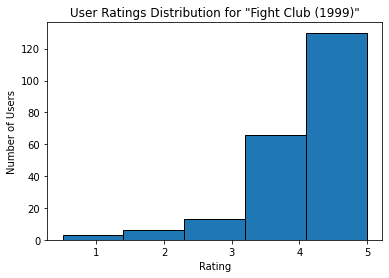

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
ratings_data = pd.read_csv("ratings.csv")
movies_data = pd.read_csv("movies.csv")
fight_club_movie_id = movies_data.loc[movies_data['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = ratings_data.loc[ratings_data['movieId'] == fight_club_movie_id, 'rating']
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [10]:
import pandas as pd
ratings_file_path = "ratings.csv"
movies_file_path = "movies.csv"
ratings_data = pd.read_csv(ratings_file_path)
grouped_ratings = ratings_data.groupby('movieId').agg({'rating': ['count', 'mean']}).reset_index()
grouped_ratings.columns = ['movieId', 'rating_count', 'rating_mean']
movies_data = pd.read_csv(movies_file_path)
merged_data = pd.merge(movies_data, grouped_ratings, on='movieId', how='inner')
filtered_data = merged_data[merged_data['rating_count'] > 50]
print(filtered_data.head())

   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  rating_count  rating_mean  
0  Adventure|Animation|Children|Comedy|Fantasy           215     3.920930  
1                   Adventure|Children|Fantasy           110     3.431818  
2                               Comedy|Romance            52     3.259615  
5                        Action|Crime|Thriller           102     3.946078  
6                               Comedy|Romance            54     3.185185  


In [11]:
most_popular_movie = filtered_data.loc[filtered_data['rating_mean'].idxmax()]
print("The most popular movie based on average user ratings is:")
print(most_popular_movie[['title', 'rating_mean']])

The most popular movie based on average user ratings is:
title          Shawshank Redemption, The (1994)
rating_mean                            4.429022
Name: 277, dtype: object


In [12]:
top_movies_by_ratings = filtered_data.sort_values(by='rating_count', ascending=False).head(5)
print("Top 5 popular movies based on number of user ratings:")
print(top_movies_by_ratings[['title', 'rating_count']])

Top 5 popular movies based on number of user ratings:
                                 title  rating_count
314                Forrest Gump (1994)           329
277   Shawshank Redemption, The (1994)           317
257                Pulp Fiction (1994)           307
510   Silence of the Lambs, The (1991)           279
1938                Matrix, The (1999)           278


In [15]:
sci_fi_movies = filtered_data[filtered_data['genres'].str.contains('Sci-Fi')]
sorted_sci_fi_movies = sci_fi_movies.sort_values(by='rating_count', ascending=False)
third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]
print("The third most popular Sci-Fi movie based on number of user ratings is:")
print(third_most_popular_sci_fi_movie[['title', 'rating_count']])

The third most popular Sci-Fi movie based on number of user ratings is:
title           Jurassic Park (1993)
rating_count                     238
Name: 418, dtype: object


In [16]:
import pandas as pd
your_imdb_ratings_data = pd.read_csv("links.csv")
highest_rated_movie = your_imdb_ratings_data.loc[your_imdb_ratings_data['imdbId'].idxmax()]
print("The movie with the highest IMDb rating is:")
print(highest_rated_movie[['movieId', 'imdbId']])

The movie with the highest IMDb rating is:
movieId     193587.0
imdbId     8391976.0
Name: 9740, dtype: float64


In [18]:
import pandas as pd
imdb_ratings_data = pd.read_csv("links.csv")
movies_data = pd.read_csv("movies.csv")
merged_data = pd.merge(imdb_ratings_data, movies_data, on='movieId', how='inner')
sci_fi_movies = merged_data[merged_data['genres'].str.contains('Sci-Fi')]
highest_rated_sci_fi_movie = sci_fi_movies.loc[sci_fi_movies['imdbId'].idxmax()]
print("The Sci-Fi movie with the highest IMDb rating has movieId:", highest_rated_sci_fi_movie['movieId'])

The Sci-Fi movie with the highest IMDb rating has movieId: 179053
